In [1]:
# Fetch google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/.shortcut-targets-by-id/1rRfzatNlbt084vqBQb_FVwXR_HCP6kGu/historical_word_embedding

/content/drive/.shortcut-targets-by-id/1rRfzatNlbt084vqBQb_FVwXR_HCP6kGu/historical_word_embedding


In [3]:
!pip install gensim

In [4]:
import os
from gensim.models import KeyedVectors

dir_path = "../historical_word_embedding"
eng_model_paths = {
    "external-fasttext-100": os.path.join(dir_path, "model/static/157_100/eng_157_100.vec"),
    "external-fasttext-300": os.path.join(dir_path, "model/static/157_300/eng_157_300.vec"),
    "internal-fasttext-100": os.path.join(dir_path, "model/static/adapt_100/eng_adapt_100.vec"),
    "internal-fasttext-300": os.path.join(dir_path, "model/static/adapt_300/eng_adapt_300.vec"),
    "pretrained_bert_100": os.path.join(dir_path, "model/extract-bert/eng_pretrained-bert_100.vec"),
    "pretrained_bert_300": os.path.join(dir_path, "model/extract-bert/eng_pretrained-bert_300.vec"),
    "fine-tuned_bert_100": os.path.join(dir_path, "model/extract-bert/eng_fine-tuned-bert-LuisAVasquez-simple-latin-bert-uncased_100.vec"),
    "fine-tuned_bert_300": os.path.join(dir_path, "model/extract-bert/eng_fine-tuned-bert-LuisAVasquez-simple-latin-bert-uncased_300.vec")
}

ang_model_paths = {
    "external-fasttext-100": os.path.join(dir_path, "model/static/157_100/ang_157_100.vec"),
    "external-fasttext-300": os.path.join(dir_path, "model/static/157_300/ang_157_300.vec"),
    "internal-fasttext-100": os.path.join(dir_path, "model/static/adapt_100/ang_adapt_100.vec"),
    "internal-fasttext-300": os.path.join(dir_path, "model/static/adapt_300/ang_adapt_300.vec"),
    "pretrained_bert_100": os.path.join(dir_path, "model/extract-bert/ang_pretrained-bert_100.vec"),
    "pretrained_bert_300": os.path.join(dir_path, "model/extract-bert/ang_pretrained-bert_300.vec"),
    "fine-tuned_bert_100": os.path.join(dir_path, "model/extract-bert/ang_fine-tuned-bert-LuisAVasquez-simple-latin-bert-uncased_100.vec"),
    "fine-tuned_bert_300": os.path.join(dir_path, "model/extract-bert/ang_fine-tuned-bert-LuisAVasquez-simple-latin-bert-uncased_300.vec")
}

def load_models(model_paths):
    models = {}
    for name, path in model_paths.items():
        try:
            model = KeyedVectors.load_word2vec_format(path, binary=False)
            models[name] = model
        except UnicodeDecodeError as e:
            print(f"Failed to load model {name} due to UnicodeDecodeError: {str(e)}")
        except Exception as e:
            print(f"An error occurred while loading model {name}: {str(e)}")
    return models


eng_models = load_models(eng_model_paths)
ang_models = load_models(ang_model_paths)

In [5]:
target_words = ['facta', 'regis', 'domini', 'perpetuam', 'elemosinam', 'episcopus', 'dies']

In [6]:
import numpy as np

def calculate_cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# calculate similarities for a given word across all target words in a model dictionary
def calculate_similarities(models, target_words):
    similarities = {}
    for model_name, model in models.items():
        model_similarities = {}
        for word in target_words:
            word_similarities = {}
            for other in target_words:
                if other != word:
                    word_similarities[other] = model.similarity(word, other)
                else:
                    word_similarities[word] = 1
            model_similarities[word] = word_similarities
        similarities[model_name] = model_similarities
    return similarities

eng_similarities = calculate_similarities(eng_models, target_words)
ang_similarities = calculate_similarities(ang_models, target_words)

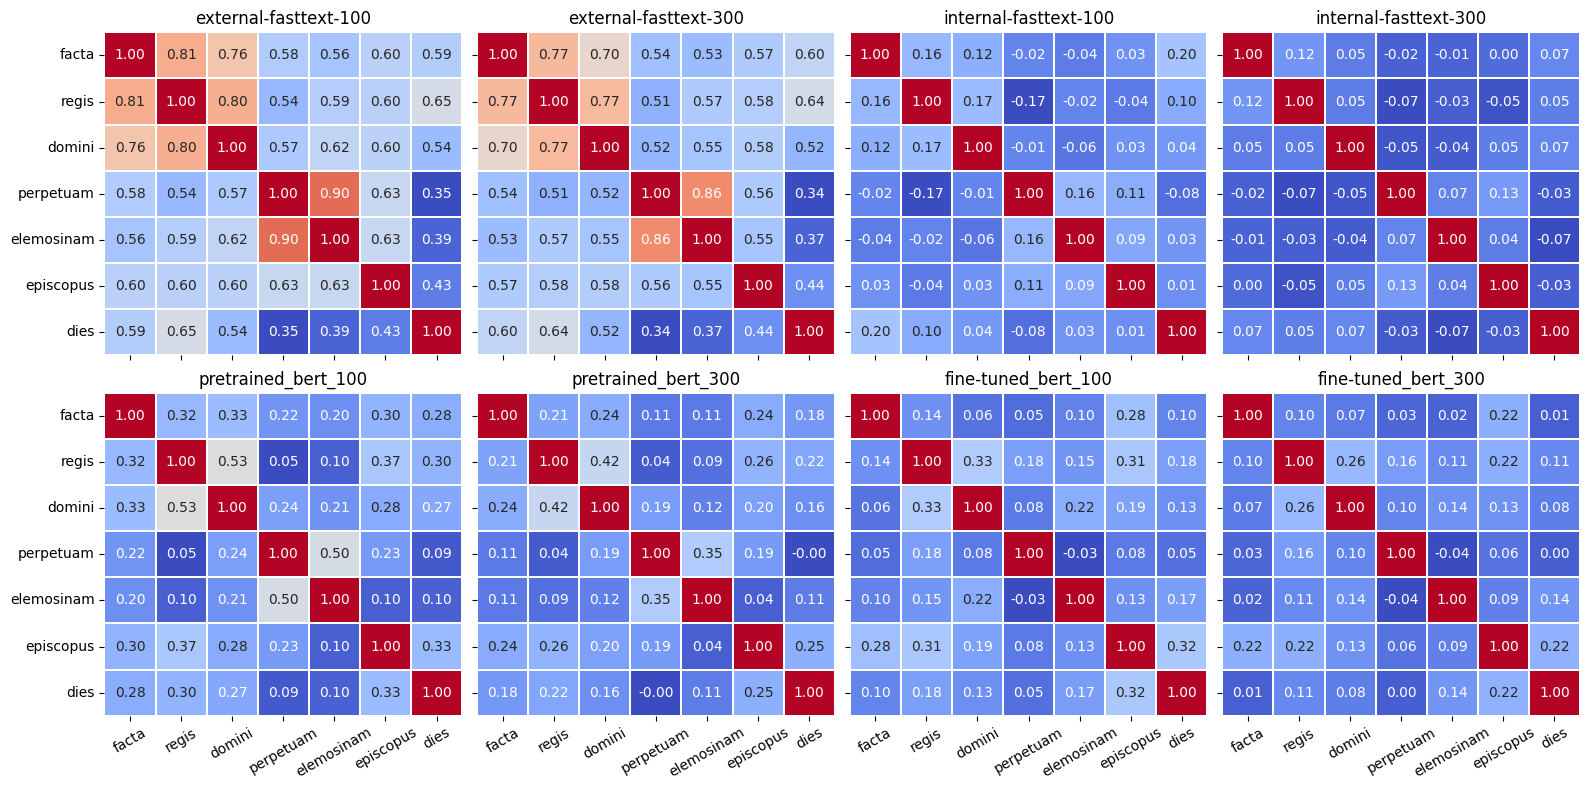

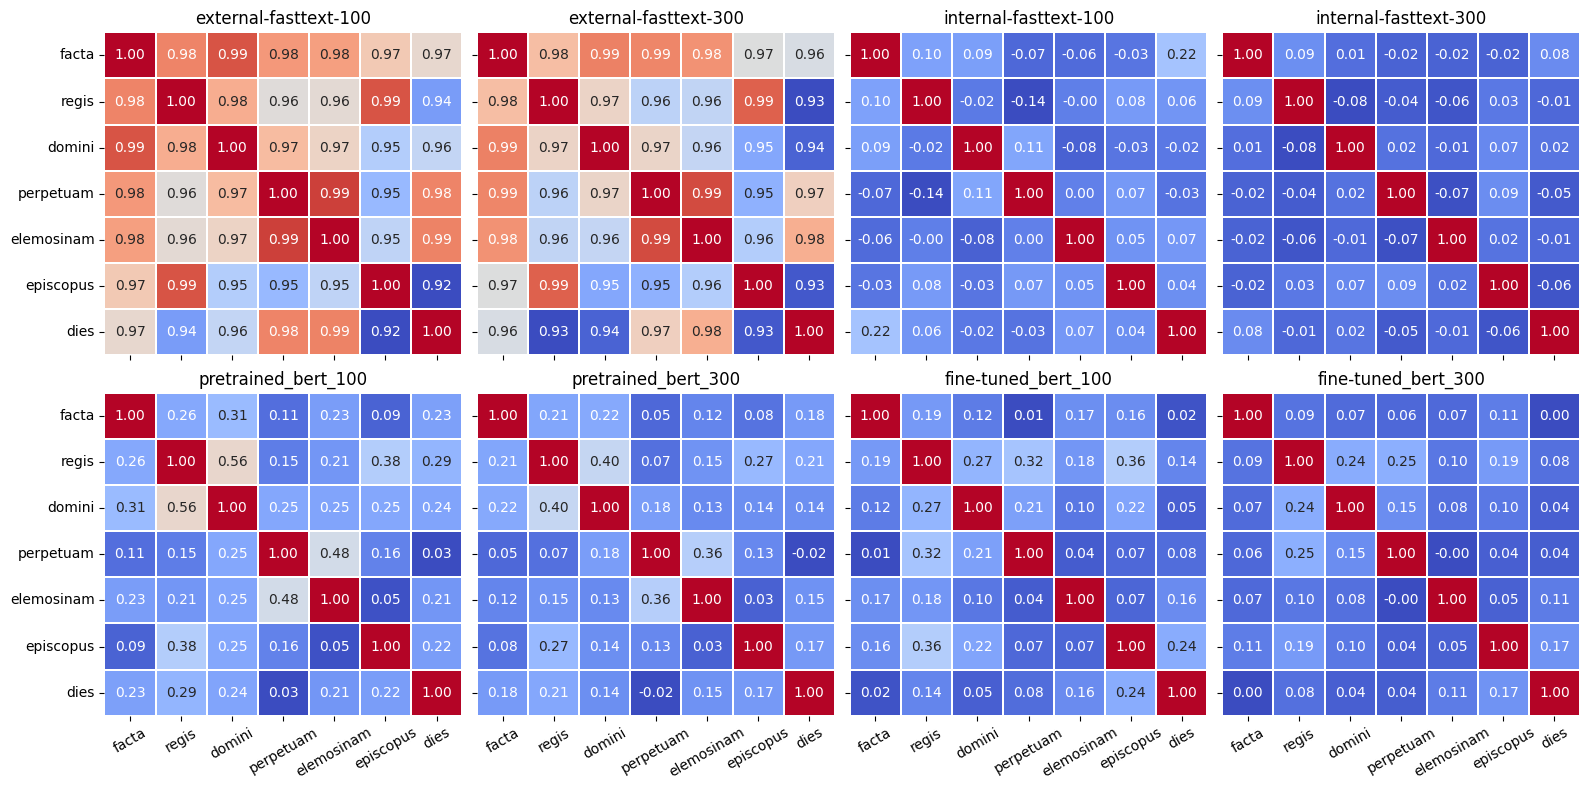

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a DataFrame from similarities dictionary
def similarities_to_dataframe(similarities):
    dataframes = {}
    for model_name, model_data in similarities.items():
        df = pd.DataFrame(model_data).fillna(0)
        dataframes[model_name] = df
    return dataframes

def plot_compact_heatmaps(dataframes, target_words):
    num_models = 8
    cols = 4
    rows = 2

    plt.figure(figsize=(cols * 4, rows * 4))
    for i, (model_name, df) in enumerate(dataframes.items(), 1):
        ax = plt.subplot(rows, cols, i)
        sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.1, cbar=False,
                      xticklabels=target_words if i > num_models - cols else [""] * len(target_words),
                      yticklabels=target_words if i % cols == 1 else [""] * len(target_words))
        plt.title(model_name)

        if i > 4:
            ax.set_xticklabels(target_words, rotation=30)

    plt.tight_layout()
    plt.show()


# calculate similarities for each model group
eng_similarities = calculate_similarities(eng_models, target_words)
ang_similarities = calculate_similarities(ang_models, target_words)

# convert to DataFrame
eng_dfs = similarities_to_dataframe(eng_similarities)
ang_dfs = similarities_to_dataframe(ang_similarities)

plot_compact_heatmaps(eng_dfs, target_words)
plot_compact_heatmaps(ang_dfs, target_words)